In [1]:
import copy

import cv2
from matplotlib import pyplot as plt
from object_data_csv import create_object_df, prepare_object_dict, add_to_csv, create_csv

##################################### Vision Imports ###########################################
import numpy as np
import os
import vision_tools as vt
from vision_tools import normclean2cv2
import kinect_vision as kv
from kinect_vision import PATH_TO_KINECT_IMAGES_DIR
from image_processing import run_calibration, run_calibration_rgb
from image_processing import run_image_processing_v2_depth, run_image_processing_v2_rgb
import vision_copy as vc
import grasping_points as gp

from tableObject_class import TableObject, match_rgb_with_depth, match_rgb_with_depth_v2
object_ipt_dict = {'cd':      [1,'rgb'],
                   'book':    [2,'rgb'],
                   'eraser':  [3,'rgb'],
                   'measure': [4,'depth'],
                   'box':     [5,'rgb'],
                   'mug':     [6,'depth'],
                   'torch':   [7,'depth'],
                   'tape':    [8,'depth'],
                   'banana':  [9,'depth'],
                   'ball':    [10,'depth']}



calibrate_check1 = raw_input("Prepared for Empty Capture?: ")
if calibrate_check1 == "yes":
    print "empty"
    empt = kv.capture_frames()
    plt.imshow(empt['ir'])
    plt.show()
    empt_all = kv.prepare_im_array(empt)
    rgb, depth, ir = empt_all
    np.savez(os.path.join(PATH_TO_KINECT_IMAGES_DIR, 'im_array_empty_FINAL'), rgb=rgb, depth=depth, ir=ir)

calibrate_check2 = raw_input("Prepared for Calibrate Capture?: ")
if calibrate_check2 == "yes":
    cali = kv.capture_frames()
    print "cali"
    cali_all = kv.prepare_im_array(cali)
    rgb, depth, ir = cali_all

    np.savez(os.path.join(PATH_TO_KINECT_IMAGES_DIR, 'im_array_cal_FINAL'), rgb=rgb, depth=depth, ir=ir)

directory = PATH_TO_KINECT_IMAGES_DIR

cali = kv.load_npz_as_array("im_array_cal_FINAL", directory)
empt = kv.load_npz_as_array("im_array_empty_FINAL", directory)

empt_all = kv.prepare_im_array(empt)
cali_all = kv.prepare_im_array(cali)

rgb, depth, ir = empt_all
rgb, depth, ir = cali_all

depth_cali = run_calibration(empt_all, cali_all, adjust=True)

rgb_cali = run_calibration_rgb(empt_all, cali_all, depth_cali, adjust=True)

(200, 173, 3)


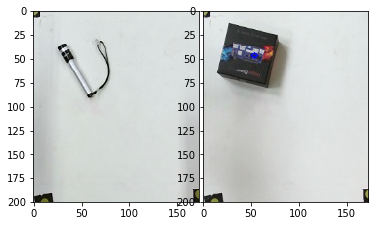

In [2]:
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(8, 14)
ax1 = plt.subplot(gs[:, :7])
ax2 = plt.subplot(gs[:, 7:14])


img = cv2.imread("test_rgb_img.jpg")
img2 = cv2.imread("test_rgb_img_centre.jpg")
print np.shape(img)

ax1.imshow(img)
ax2.imshow(img2)
plt.show()

In [3]:
##################### Vision Initialise #####################################
directory = PATH_TO_KINECT_IMAGES_DIR

cali = kv.load_npz_as_array("im_array_cal_FINAL", directory)
empt = kv.load_npz_as_array("im_array_empty_FINAL", directory)

empt_all = kv.prepare_im_array(empt)
cali_all = kv.prepare_im_array(cali)

depth_cali = run_calibration(empt_all, cali_all, adjust=False)
rgb_cali = run_calibration_rgb(empt_all, cali_all, depth_cali, adjust=False)

{'radius': [8, 16], 'thresh': [85, 100]}
28
All Calibration points found
{'radius': [5, 8], 'thresh': [85, 220]}
22
All Calibration points found
(173, 200)


Ready?: yes
Depth Done
MATHCMCMCMASDFASDFASDF
(173, 200)
[2, 3]
Making depth List ...
RGB data not considered
An exception of type AttributeError occurred. Arguments:
("'TableObject' object has no attribute 'rgb_box'",)
RGB data not considered
An exception of type AttributeError occurred. Arguments:
("'TableObject' object has no attribute 'rgb_box'",)
Making rgb object list...
Depth data not implemented
An exception of type AttributeError occurred. Arguments:
("'TableObject' object has no attribute 'box'",)
item
Depth data not implemented
An exception of type AttributeError occurred. Arguments:
("'TableObject' object has no attribute 'box'",)
item
Depth data not implemented
An exception of type AttributeError occurred. Arguments:
("'TableObject' object has no attribute 'box'",)
item
Length of depth and obj lists: 2 3
1 : No depth profile found
2 : No depth profile found
Matched based on Contour Overlap
1
2
3
Index([u'box', u'ball'], dtype='object', name=u'name')
NAME:  box
item
Index([

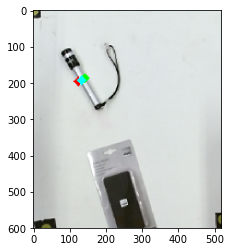

~~~~~~~~~~~~~~ OBJECT ATTRIBUTES ~~~~~~~~~~~~~~~
GRASPING
Height:        (0.050378092, 0.083451994, 0.27213007, 0.0)
RGB Aspect:    0.830421358014
Circularness:  0.124309611025


In [4]:
SHOW=True
while True:
    capture_check = raw_input("Ready?: ")
    if capture_check == "yes":
        test = kv.capture_frames()
        test_all = kv.prepare_im_array(test)
        break

######## Process Test Image and Retrieve Depth and Contour Information from Depth and RGB Data ##########

rgb, depth, ir = test_all


normclean, sorted_family = run_image_processing_v2_depth(test_all, 
                                                         depth_cali, 
                                                         show=False)

print "MATHCMCMCMASDFASDFASDF"

rgbnormclean, rgb_family, test_rgbx_img = run_image_processing_v2_rgb(test_all, 
                                                                      rgb_cali, 
                                                                      depth_cali, 
                                                                      show=False)

######## Clean the images and convert them so that they are cv2 compatible ############

depth_normclean = normclean2cv2(normclean)
rgb_normclean = normclean2cv2(rgbnormclean)

test_rgb_img = vt.convert2rgb(test_rgbx_img)

cv2.imwrite("test_rgb_img.jpg", test_rgb_img)

####### Create List of Objects and match the rgb and depth data ##########
object_list = match_rgb_with_depth_v2(sorted_family, rgb_family, depth_normclean, test_rgb_img)

#cv2.imwrite("test_rgb_img.jpg", test_rgb_img)
cv2.imwrite("depth_normclean.jpg", depth_normclean)

import object_recognition_tools as ort

excluded_val = ['centre', 'rgb_centre', 'number of children']
extras = ['R','G','B', 'centre_offset']

obj_features_mean, obj_features_std = ort.prepare_obj_features_param(obj_feat_csv = 'object_features.csv', 
                                                                 excluded_val = excluded_val, 
                                                                 extras=extras)

rec_df = ort.prepare_pick_obj_features_param(object_list, excluded_val, extras)
cost_list = ort.create_cost_list(obj_features_mean, obj_features_std, rec_df)
object_list = ort.label_object_list(object_list, cost_list, test_rgb_img, show=False)

for item in object_list.keys():
    if object_list[item].height[0] == 0:
        #if abs(object_list[item].rgb_area - 3*obj_features_mean.rgb_area.book)/obj_features_std.rgb_area.book > 1:
            #print "TOO SMALL/BIG TO BE BOOK"
            #del object_list[item]
        if object_list[item].name != 'cd':
            print "TO BE DELETED: ",item
            del object_list[item]

if len(object_list) == 0:
    "THERE IS NOTHING INSIDE!!!!!!!!!!!"

pick_obj = object_list.values()[0]

print "==========================================="
print "        OBJECT IS: ", pick_obj.name
print "==========================================="

object_df = create_object_df()
create_csv("testing_object_features", object_df)
for item in object_list.keys():
    object_dict = prepare_object_dict(object_list[item], object_df)
    object_df = object_df.append(object_dict, ignore_index=True)

add_to_csv("testing_object_features.csv", object_df)

########### Find Circles for Pix3world transformation ################
circles = depth_cali[4]
cali_circles_init = circles-circles[0][0]
cali_circles=[]
for circ in cali_circles_init[0]:
    cali_circles.append([circ[0]/2, circ[1]/2])

print cali_circles

p1, inverse = vc.pix3world_cal(cali_circles[0],cali_circles[2], cali_circles[1])


################ Find the suction or grasping points in pixels ###########
ipt = object_ipt_dict[pick_obj.name][0]

if ipt>5:
    print "OBJECT TO BE PICKED BY GRASPING"
    first_node, node1, node2 = gp.first_grasping_point(pick_obj)
    current_line = gp.find_perpendicular_line(node1, node2[0])
    possible_pairs = gp.find_possible_cross_pairs(pick_obj, first_node, current_line)
    possible_pairs = gp.remove_duplicates(possible_pairs, node1, node2[0])
    possible_second_node, possible_grasp_centre = gp.find_second_grasping_point(possible_pairs, 
                                                                                first_node, 
                                                                                pick_obj)
    second_node, grasp_centre = gp.determine_best_grasping_point(possible_second_node, 
                                                                 possible_grasp_centre,
                                                                 first_node)

    if ipt==7:
        first_node, second_node = gp.fix_torch_orientation(pick_obj, rgb_normclean, first_node, second_node)
    
    
    grasp_img = gp.display_grasping_points(test_rgb_img, first_node, second_node, 
                                           grasp_centre, pick_obj, show=SHOW)
    cv2.imwrite("display_grasp_img.jpg", grasp_img)

else:
    print "OBJECT TO BE PICKED BY SUCTION"
    if object_ipt_dict[pick_obj.name][1] == 'rgb':
        x_pix = pick_obj.rgb_centre[0]
        y_pix = pick_obj.rgb_centre[1]
    else:
        x_pix = pick_obj.centre[0]
        y_pix = pick_obj.centre[1]

    p = [x_pix, y_pix]
    x,y = vc.pix3world(p1, inverse, p)
    x = x[0,0]
    y = y[0,0]
    
    show_img = copy.copy(test_rgb_img)
    cv2.circle(show_img,(int(x_pix),int(y_pix)),3,(0,0,255),1)
    cv2.circle(show_img,(int(x_pix),int(y_pix)),2,(0,0,255),1)

    if SHOW:
        plt.figure("Circles")
        plt.imshow(show_img)
        plt.show()
    cv2.imwrite("display_suction_img.jpg", show_img)


print "~~~~~~~~~~~~~~ OBJECT ATTRIBUTES ~~~~~~~~~~~~~~~"
if ipt>5:
    print "GRASPING"
else:
    print "SUCTION"
print "Height:       ", pick_obj.height
print "RGB Aspect:   ", pick_obj.rgb_aspect
try:
    print "Circularness: ", pick_obj.circularness
except:
    print "no depth"


NUM OBJECTS TOTAL:  1
(200, 173, 3)


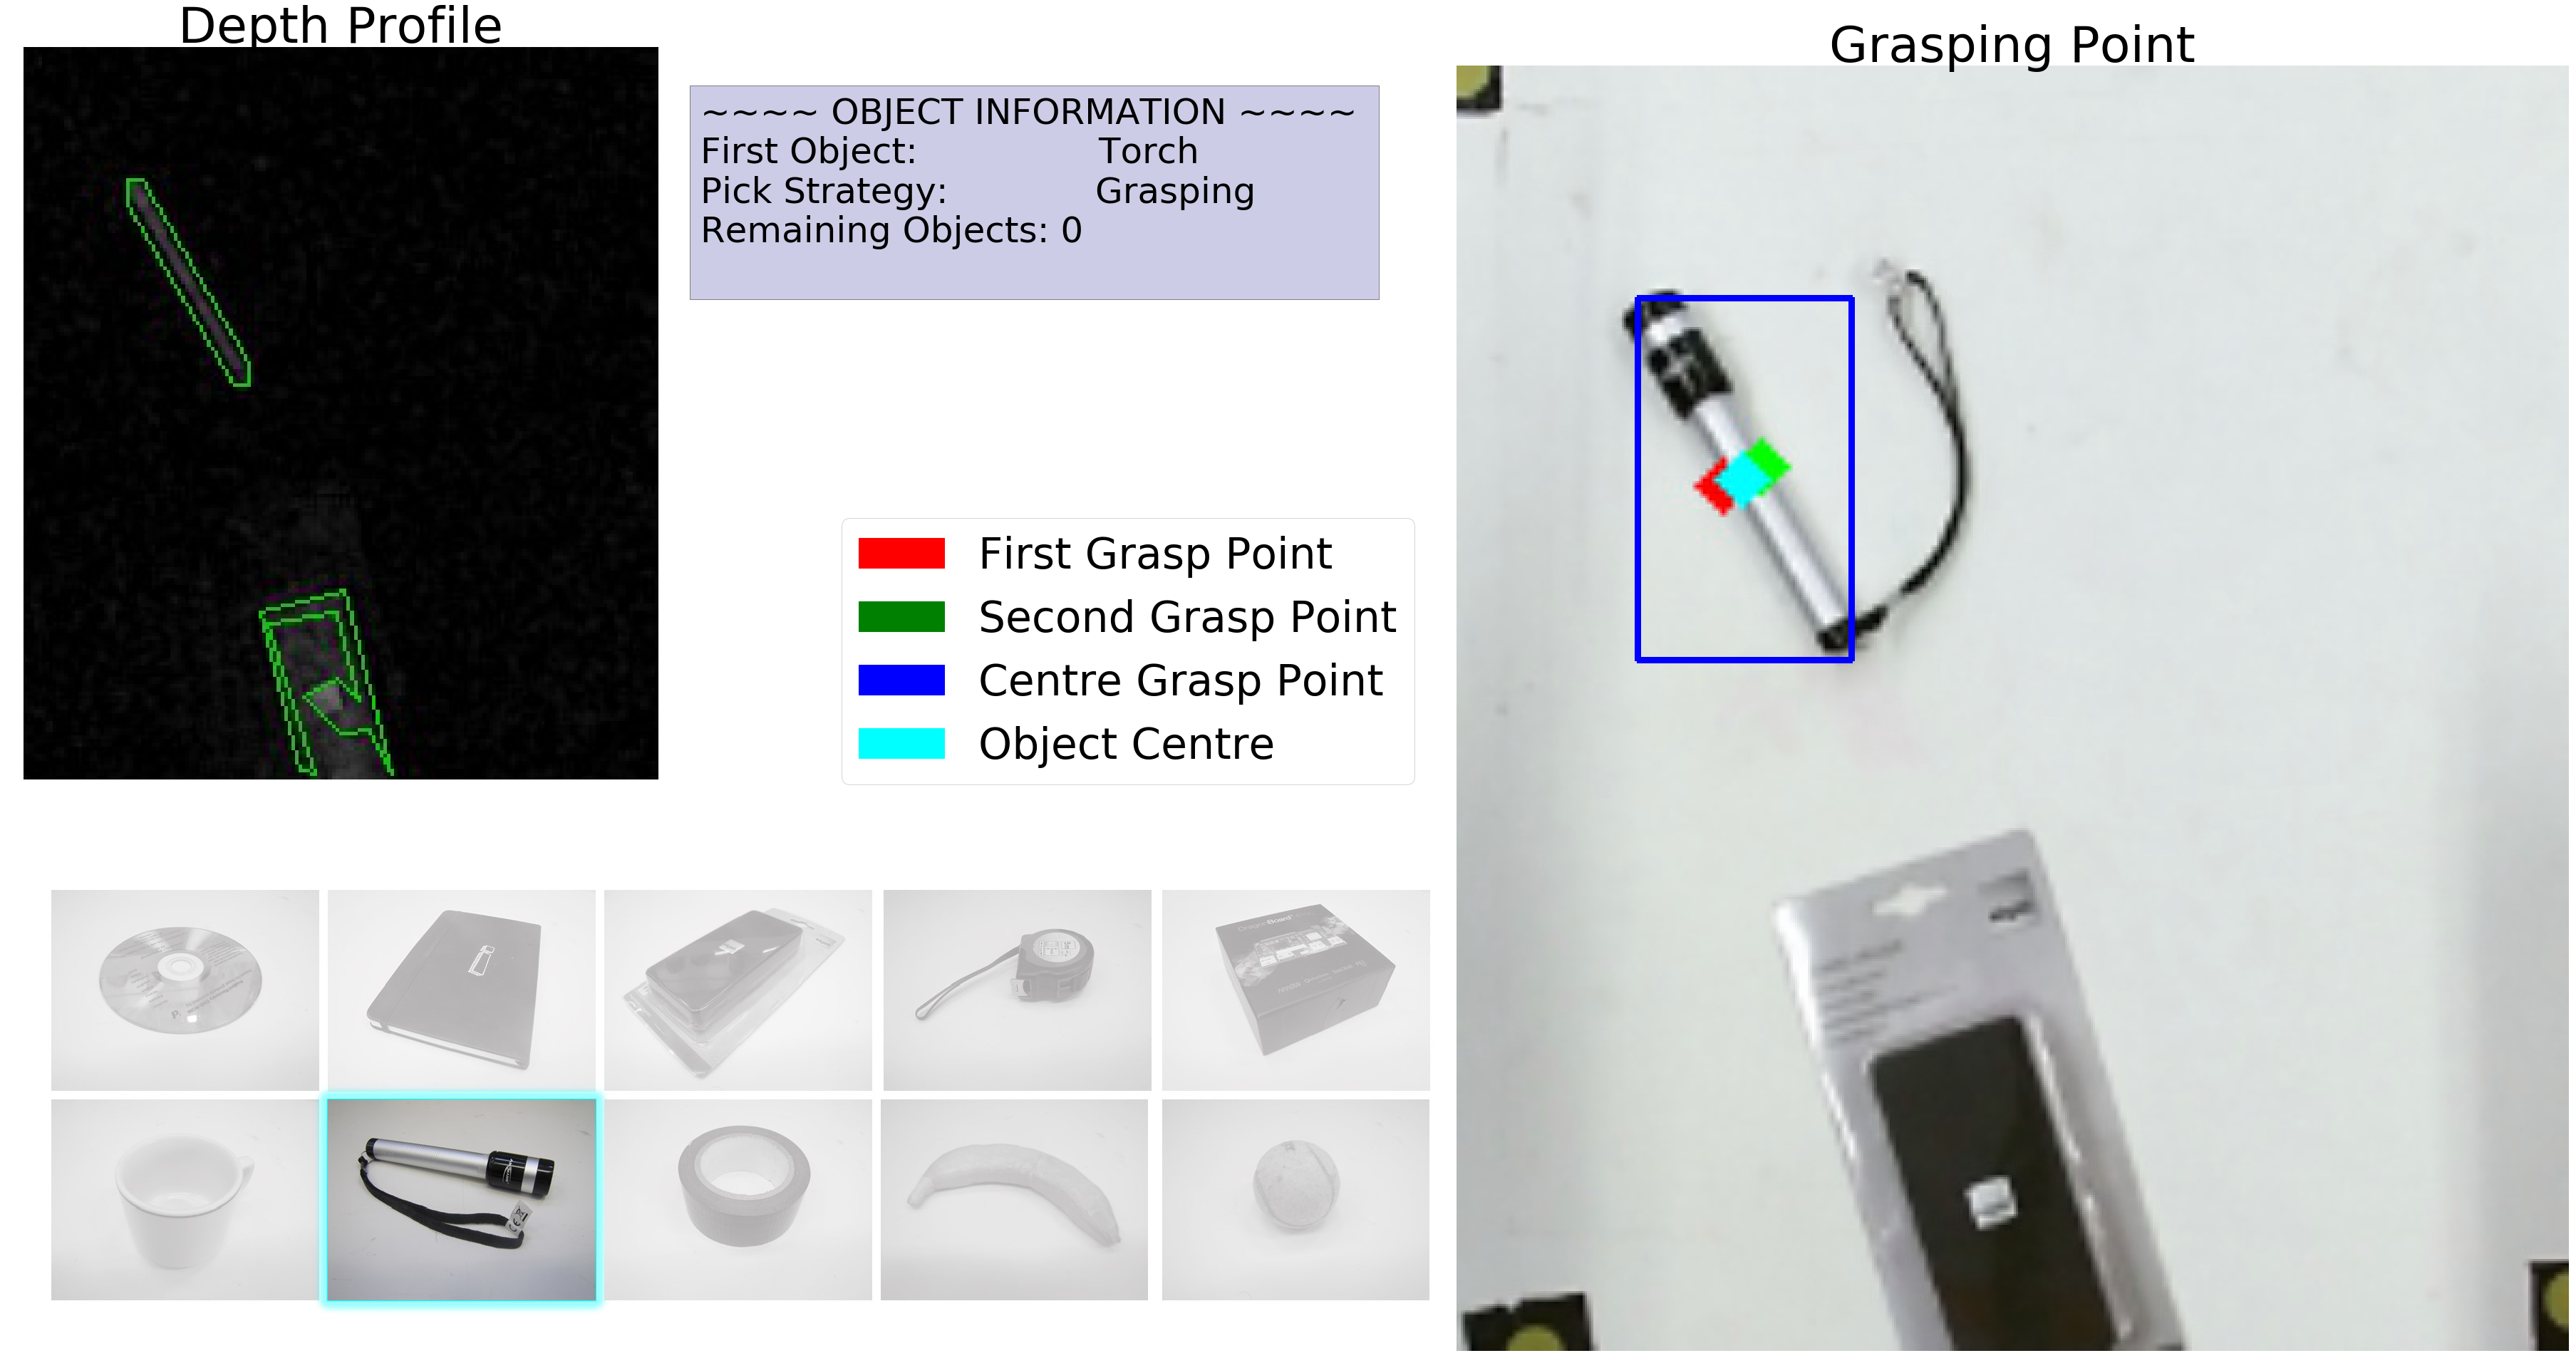

In [5]:
copy_img = copy.copy((normclean*255).astype('uint8'))
copy_img = cv2.cvtColor(copy_img, cv2.COLOR_GRAY2RGB)
for member in sorted_family:
    cv2.drawContours(copy_img, [member['contour'][0]], -1, (5,205,5), 1)
cv2.imwrite("display_depth_profile.jpg", copy_img)

import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches


def display_second_screen(normclean, sorted_family, object_list, cost_list, ipt, pick_obj):
    red_patch = mpatches.Patch(color='red', label='First Grasp Point')
    blue_patch = mpatches.Patch(color='blue', label='Centre Grasp Point')
    green_patch = mpatches.Patch(color='green', label='Second Grasp Point')
    cyan_patch = mpatches.Patch(color='cyan', label='Object Centre ')

    plt.figure("SECOND SCREEN")
    gs = gridspec.GridSpec(90, 160)

    ax1 = plt.subplot(gs[:50, :40])
    plt.title("Depth Profile")
    plt.axis('off')

    ax2 = plt.subplot(gs[:, 90:])
    plt.title("Grasping Point")
    plt.axis('off')

    ax3 = plt.subplot(gs[:50, 40:90])
    plt.axis('off')

    ax4 = plt.subplot(gs[50:, :90])
    plt.axis('off')

    #print "COST LIST: ", cost_list
    remain_data = ""
    num_remain = 0
    print "NUM OBJECTS TOTAL: ", len(object_list)
    for i,item in enumerate(sorted(object_list.keys())):
        if i > 0:
            print cost_list[i].keys()[0]
            remain_data = (remain_data+cost_list[i].keys()[0].capitalize()+", ")
            num_remain = num_remain + 1
    remain_data = remain_data[:-2]

    if ipt>5:
        img2 = cv2.imread("display_grasp_img.jpg")
        img2 = draw_min_bounding_rect(pick_obj.contour[0], img2)
        ax3.legend(handles=[red_patch, green_patch, blue_patch, cyan_patch],
                   loc='lower left', bbox_to_anchor=(0.05, 0), 
                   borderaxespad=0,prop={'size':5})
        data = ("~~~~ OBJECT INFORMATION ~~~~~ \n"
                "First Object:                "+pick_obj.name.capitalize()+" \n"
                "Pick Strategy:             "+"Grasping \n"
                "Remaining Objects: "+ str((num_remain))+ " \n"+
                remain_data)
    else:
        img2 = cv2.imread("display_suction_img.jpg")
        img2 = draw_min_bounding_rect(pick_obj.contour[0], img2)
        ax3.legend(handles=[red_patch, green_patch, blue_patch, cyan_patch],
                   loc='lower left', bbox_to_anchor=(0.05, 0), 
                   borderaxespad=0,prop={'size':5})
        data = ("~~~~ OBJECT INFORMATION ~~~~~ \n"
                "First Object:                "+pick_obj.name.capitalize()+" \n"
                "Pick Strategy:             "+"Suction \n"
                "Remaining Objects: "+ str((num_remain))+ " \n"+
                remain_data)

    ax3.text(0,0.6,data,bbox=dict(boxstyle="square",
                       ec=(0.5, 0.5, 0.5),
                       fc=(0.8, 0.8, 0.9),
                       ),fontsize=5)   
    disp_img = cv2.imread(os.path.join("screen_pic", 'Slide{}.JPG'.format(ipt)))
    disp_img = cv2.cvtColor(disp_img, cv2.COLOR_RGB2BGR)

    ax4.imshow(disp_img)

    img = cv2.imread("display_depth_profile.jpg")

    print np.shape(img)

    ax1.imshow(img)
    ax2.imshow(img2)

    plt.show()

img = gp.display_second_screen(normclean, sorted_family, object_list, cost_list, ipt, pick_obj)
plt.show()

In [9]:
a = [22,33,44,55,66,77]

a[-1:2:2]

[]